## ライブラリのインポート

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#tensorflowの互換性WARNING文の回避
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.FATAL)

np.random.seed(123)


Using TensorFlow backend.


## データの生成

In [2]:
# 研修用データロード
from mldata import mldata
X,Y,y,X_train,X_test,Y_train,Y_test, X_validation, Y_train, Y_validation = mldata.mldata2()

In [3]:
# # データロード
# # 使用するときは「ctrl+/」でコメントを外す
# mnist = datasets.fetch_openml('MNIST_784', version=1, return_X_y=False)

# n = len(mnist.data)
# N = 30000  # MNISTの一部を使う
# N_train = 20000
# N_validation = 4000
# indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

# X = mnist.data[indices]
# X = X / 255.0
# X = X - X.mean(axis=1).reshape(len(X), 1)
# y = mnist.target[indices]
# Y = np.eye(10)[y.astype(int)]

# X_train, X_test, Y_train, Y_test = \
#     train_test_split(X, Y, train_size=N_train)
# X_train, X_validation, Y_train, Y_validation = \
#     train_test_split(X_train, Y_train, test_size=N_validation)


## モデル設定

In [4]:
n_in = len(X[0])  # 784
n_hiddens = [200, 200, 200]
n_out = len(Y[0])  # 10
activation = 'relu'


def weight_variable(shape, name=None):
    return np.sqrt(2.0 / shape[0]) * np.random.normal(size=shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model = Sequential()
for i, input_dim in enumerate(([n_in] + n_hiddens)[:-1]):
    model.add(Dense(n_hiddens[i], input_dim=input_dim,
                    kernel_initializer=weight_variable))
    model.add(BatchNormalization())
    model.add(Activation(activation))

model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])


## モデル学習

In [5]:
epochs = 200
batch_size = 200

hist = model.fit(X_train, Y_train, epochs=epochs,
                 batch_size=batch_size,
                 validation_data=(X_validation, Y_validation),
                 callbacks=[early_stopping])


Train on 16000 samples, validate on 4000 samples
Epoch 1/200
16000/16000 [==============================] - 4s 238us/step - loss: 0.3286 - acc: 0.8963 - val_loss: 0.2972 - val_acc: 0.9155
Epoch 2/200
16000/16000 [==============================] - 1s 86us/step - loss: 0.1225 - acc: 0.9621 - val_loss: 0.3055 - val_acc: 0.9203
Epoch 3/200
16000/16000 [==============================] - 1s 81us/step - loss: 0.0981 - acc: 0.9690 - val_loss: 0.3420 - val_acc: 0.9120
Epoch 4/200
16000/16000 [==============================] - 1s 82us/step - loss: 0.0717 - acc: 0.9773 - val_loss: 0.1865 - val_acc: 0.9505
Epoch 5/200
16000/16000 [==============================] - 1s 80us/step - loss: 0.0516 - acc: 0.9819 - val_loss: 0.2221 - val_acc: 0.9440
Epoch 6/200
16000/16000 [==============================] - 1s 83us/step - loss: 0.0482 - acc: 0.9838 - val_loss: 0.2092 - val_acc: 0.9512
Epoch 7/200
16000/16000 [==============================] - 2s 108us/step - loss: 0.0415 - acc: 0.9858 - val_loss: 0.2076 -

## 学習の進み具合を可視化

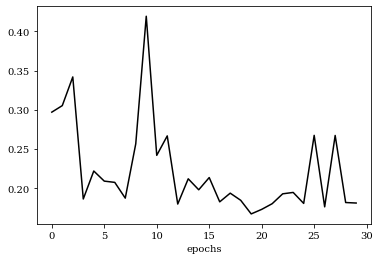

In [6]:
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(val_loss)), val_loss, label='loss', color='black')
plt.xlabel('epochs')
plt.show()


## 予測精度の評価

In [7]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 74us/step
[0.1748643721126944, 0.9663]
